## Carga de datos
Primero cargamos los datos que vamos a utilizar verificamos tamaño y formato para poder entender mejor como trabajar con ellos.

In [69]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

# 1. Cargar datos
ruta_datos = "../data/Datos Lab 1.csv"  
df = pd.read_csv(ruta_datos)

print("Shape:", df.shape)
df.head()
df.info()
df.describe(include="all").T




Shape: (1639, 24)
<class 'pandas.DataFrame'>
RangeIndex: 1639 entries, 0 to 1638
Data columns (total 24 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Patient ID                    1639 non-null   str    
 1   Date of Service               1639 non-null   str    
 2   Sex                           1639 non-null   str    
 3   Age                           1571 non-null   float64
 4   Weight (kg)                   1566 non-null   float64
 5   Height (m)                    1578 non-null   float64
 6   BMI                           1586 non-null   float64
 7   Abdominal Circumference (cm)  1578 non-null   float64
 8   Blood Pressure (mmHg)         1639 non-null   str    
 9   Total Cholesterol (mg/dL)     1571 non-null   float64
 10  HDL (mg/dL)                   1557 non-null   float64
 11  Fasting Blood Sugar (mg/dL)   1585 non-null   float64
 12  Smoking Status                1639 non-null   str    
 

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Patient ID,1639,1376,oSqq7069,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Date of Service,1639,1274,09-20-2023,6,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Sex,1639,2,M,821,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Age,1571.0,NaN,NaN,NaN,46.803186,13.039479,6.134,37.0,46.0,55.0,89.42
Weight (kg),1566.0,NaN,NaN,NaN,85.666006,21.712504,13.261,67.1,86.314,104.8015,158.523
Height (m),1578.0,NaN,NaN,NaN,1.757439,0.118012,1.371,1.6665,1.76,1.85,2.146
BMI,1586.0,NaN,NaN,NaN,28.424744,7.309275,4.317,22.6,28.0,33.963,53.028
Abdominal Circumference (cm),1578.0,NaN,NaN,NaN,91.538861,13.427985,49.542,79.7,91.2,102.26725,136.336
Blood Pressure (mmHg),1639,1152,127/84,6,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Total Cholesterol (mg/dL),1571.0,NaN,NaN,NaN,199.043673,59.38867,-1.256,150.0,199.0,250.0,385.679


## Duplicados totales

Vamos a comenzar verificando si existen duplicados exactos, es decir, filas completamente idénticas en todas sus columnas.

Este tipo de duplicados generalmente se producen por errores de carga o integración de datos.
En caso de existir, pueden inflar artificialmente el tamaño del dataset y sesgar el modelo, por lo que suelen eliminarse.

In [57]:
# Cantidad de duplicados exactos
duplicados_totales = df.duplicated().sum()
print("Número de duplicados totales:", duplicados_totales)

# Ver algunos ejemplos si existen
df[df.duplicated()].head()

Número de duplicados totales: 151


,Patient ID,Date of Service,Sex,Age,Weight (kg),Height (m),BMI,Abdominal Circumference (cm),Blood Pressure (mmHg),Total Cholesterol (mg/dL),HDL (mg/dL),Fasting Blood Sugar (mg/dL),Smoking Status,Diabetes Status,Physical Activity Level,Family History of CVD,Height (cm),Waist-to-Height Ratio,Systolic BP,Diastolic BP,Blood Pressure Category,Estimated LDL (mg/dL),CVD Risk Score,CVD Risk Level
135,Lclg1001,07-05-2025,F,54.0,119.571,1.764,29.949,97.329,161/85,244.0,46.0,155.0,Y,Y,Moderate,Y,176.411,0.552,161.0,85.0,Hypertension Stage 1,168.0,20.920,INTERMEDIARY
148,YLCe2926,08-09-2022,F,44.0,66.000,1.690,23.100,91.200,123/89,126.0,50.0,79.0,N,Y,High,Y,169.000,0.540,123.0,89.0,Hypertension Stage 1,46.0,15.290,INTERMEDIARY
163,tCaB2910,2025-02-23,M,35.0,87.700,1.860,25.300,87.900,135/91,253.0,74.0,124.0,Y,N,High,Y,186.000,0.473,135.0,91.0,Hypertension Stage 1,149.0,16.870,HIGH
169,QJtE0701,07 Nov 25,F,49.0,99.522,1.969,5.184,85.955,127/98,135.0,55.0,120.0,N,Y,High,N,196.908,0.437,127.0,98.0,Hypertension Stage 2,50.0,15.168,INTERMEDIARY
215,xbYu9929,20/11/2024,M,46.0,72.000,1.750,23.500,89.100,100/90,198.0,76.0,141.0,N,N,Low,N,175.000,0.509,100.0,90.0,Hypertension Stage 2,92.0,13.660,INTERMEDIARY


## Duplicados parciales (por paciente)

Ahora verificamos si existen registros repetidos del mismo paciente (Patient ID).

A diferencia de los duplicados totales, estos NO necesariamente son errores, ya que pueden representar:
	•	controles médicos en distintas fechas
	•	evolución del paciente
	•	cambios en su condición de salud

Por lo tanto, estos registros no deben eliminarse automáticamente, sino analizarse.

In [58]:
duplicados_paciente = df["Patient ID"].duplicated().sum()
print("Pacientes con múltiples registros:", duplicados_paciente)

df[df["Patient ID"].duplicated(keep=False)].sort_values("Patient ID").head(20)

Pacientes con múltiples registros: 263


,Patient ID,Date of Service,Sex,Age,Weight (kg),Height (m),BMI,Abdominal Circumference (cm),Blood Pressure (mmHg),Total Cholesterol (mg/dL),HDL (mg/dL),Fasting Blood Sugar (mg/dL),Smoking Status,Diabetes Status,Physical Activity Level,Family History of CVD,Height (cm),Waist-to-Height Ratio,Systolic BP,Diastolic BP,Blood Pressure Category,Estimated LDL (mg/dL),CVD Risk Score,CVD Risk Level
17,AhYt1346,09-28-2020,M,41.0,71.300,1.730,23.800,107.900,139/61,253.0,77.0,94.0,Y,N,Low,Y,173.000,NaN,139.0,NaN,Hypertension Stage 1,146.000,16.770,HIGH
1584,AhYt1346,09-28-2020,M,41.0,71.300,1.730,23.800,107.900,139/61,253.0,77.0,94.0,Y,N,Low,Y,173.000,NaN,139.0,NaN,Hypertension Stage 1,146.000,16.770,HIGH
1227,AhYt1346,09-28-2020,M,41.0,71.300,1.730,23.800,107.900,139/61,253.0,77.0,94.0,Y,N,Low,Y,173.000,NaN,139.0,NaN,Hypertension Stage 1,146.000,-13.090,HIGH
1117,Axab9332,2021-12-11,F,58.0,69.870,1.944,20.785,86.259,162/106,151.0,NaN,139.0,Y,N,Moderate,N,194.450,0.444,162.0,106.0,Hypertension Stage 2,44.000,23.430,HIGH
383,Axab9332,2021-12-11,F,58.0,69.870,1.944,20.785,86.259,162/106,151.0,NaN,139.0,Y,N,Moderate,N,194.450,0.444,162.0,106.0,Hypertension Stage 2,44.000,15.277,HIGH
1469,BQvQ6431,09/11/2020,M,33.0,118.300,1.690,41.400,72.100,116/93,171.0,44.0,145.0,N,N,Moderate,N,210.554,0.427,116.0,93.0,Hypertension Stage 2,97.000,29.833,LOW
130,BQvQ6431,09/11/2020,M,33.0,118.300,1.690,41.400,72.100,116/93,171.0,44.0,145.0,N,N,Moderate,N,210.554,0.427,116.0,93.0,Hypertension Stage 2,97.000,17.500,LOW
1544,BQvQ6431,09/11/2020,M,33.0,118.300,1.690,41.400,72.100,116/93,171.0,44.0,145.0,N,N,Moderate,N,210.554,0.427,116.0,93.0,Hypertension Stage 2,97.000,17.500,LOW
846,BqZp2317,"April 15, 2025",F,72.0,57.836,1.554,24.008,115.565,157/75,211.0,81.0,85.0,N,N,Moderate,N,155.404,0.744,157.0,75.0,Hypertension Stage 2,100.000,16.872,INTERMEDIARY
305,BqZp2317,"April 15, 2025",F,72.0,57.836,1.554,24.008,115.565,157/75,211.0,81.0,85.0,N,N,Moderate,N,155.404,0.744,157.0,75.0,Hypertension Stage 2,100.000,7.050,INTERMEDIARY


## Duplicados parciales más específicos (Paciente + Fecha)

Para distinguir entre:
	•	repetición real de la observación
	•	seguimiento clínico

verificamos duplicados en la combinación Paciente + Fecha de servicio

In [59]:
duplicados_paciente_fecha = df.duplicated(subset=["Patient ID", "Date of Service"]).sum()
print("Duplicados Paciente + Fecha:", duplicados_paciente_fecha)

df[df.duplicated(subset=["Patient ID", "Date of Service"], keep=False)].sort_values(["Patient ID","Date of Service"]).head(20)

Duplicados Paciente + Fecha: 263


,Patient ID,Date of Service,Sex,Age,Weight (kg),Height (m),BMI,Abdominal Circumference (cm),Blood Pressure (mmHg),Total Cholesterol (mg/dL),HDL (mg/dL),Fasting Blood Sugar (mg/dL),Smoking Status,Diabetes Status,Physical Activity Level,Family History of CVD,Height (cm),Waist-to-Height Ratio,Systolic BP,Diastolic BP,Blood Pressure Category,Estimated LDL (mg/dL),CVD Risk Score,CVD Risk Level
17,AhYt1346,09-28-2020,M,41.0,71.300,1.730,23.800,107.900,139/61,253.0,77.0,94.0,Y,N,Low,Y,173.000,NaN,139.0,NaN,Hypertension Stage 1,146.000,16.770,HIGH
1227,AhYt1346,09-28-2020,M,41.0,71.300,1.730,23.800,107.900,139/61,253.0,77.0,94.0,Y,N,Low,Y,173.000,NaN,139.0,NaN,Hypertension Stage 1,146.000,-13.090,HIGH
1584,AhYt1346,09-28-2020,M,41.0,71.300,1.730,23.800,107.900,139/61,253.0,77.0,94.0,Y,N,Low,Y,173.000,NaN,139.0,NaN,Hypertension Stage 1,146.000,16.770,HIGH
383,Axab9332,2021-12-11,F,58.0,69.870,1.944,20.785,86.259,162/106,151.0,NaN,139.0,Y,N,Moderate,N,194.450,0.444,162.0,106.0,Hypertension Stage 2,44.000,15.277,HIGH
1117,Axab9332,2021-12-11,F,58.0,69.870,1.944,20.785,86.259,162/106,151.0,NaN,139.0,Y,N,Moderate,N,194.450,0.444,162.0,106.0,Hypertension Stage 2,44.000,23.430,HIGH
130,BQvQ6431,09/11/2020,M,33.0,118.300,1.690,41.400,72.100,116/93,171.0,44.0,145.0,N,N,Moderate,N,210.554,0.427,116.0,93.0,Hypertension Stage 2,97.000,17.500,LOW
1469,BQvQ6431,09/11/2020,M,33.0,118.300,1.690,41.400,72.100,116/93,171.0,44.0,145.0,N,N,Moderate,N,210.554,0.427,116.0,93.0,Hypertension Stage 2,97.000,29.833,LOW
1544,BQvQ6431,09/11/2020,M,33.0,118.300,1.690,41.400,72.100,116/93,171.0,44.0,145.0,N,N,Moderate,N,210.554,0.427,116.0,93.0,Hypertension Stage 2,97.000,17.500,LOW
305,BqZp2317,"April 15, 2025",F,72.0,57.836,1.554,24.008,115.565,157/75,211.0,81.0,85.0,N,N,Moderate,N,155.404,0.744,157.0,75.0,Hypertension Stage 2,100.000,7.050,INTERMEDIARY
846,BqZp2317,"April 15, 2025",F,72.0,57.836,1.554,24.008,115.565,157/75,211.0,81.0,85.0,N,N,Moderate,N,155.404,0.744,157.0,75.0,Hypertension Stage 2,100.000,16.872,INTERMEDIARY


## Tratamiento de duplicados

A partir del análisis previo se encontraron tres tipos de duplicados:
	•	151 filas completamente idénticas
	•	263 registros repetidos por paciente
	•	263 registros repetidos por combinación Paciente + Fecha

Dado que la cantidad de duplicados por paciente coincide exactamente con los duplicados por paciente-fecha, se concluye que no corresponden a controles médicos en distintas fechas sino a registros replicados del mismo evento clínico.

Por lo tanto, el dataset no es longitudinal sino transversal con errores de carga.

En consecuencia, no se deben promediar ni conservar múltiples registros, ya que esto introduciría sesgos en el modelo al sobre-representar ciertos pacientes.

Se decide conservar una única observación por combinación Patient ID + Date of Service.

In [60]:
print("Shape antes:", df.shape)

# eliminar duplicados por paciente + fecha
df = df.drop_duplicates(subset=["Patient ID", "Date of Service"]).copy()

print("Shape después:", df.shape)

Shape antes: (1639, 24)
Shape después: (1376, 24)


In [61]:
print("Duplicados totales:", df.duplicated().sum())
print("Duplicados paciente+fecha:", df.duplicated(subset=["Patient ID","Date of Service"]).sum())

Duplicados totales: 0
Duplicados paciente+fecha: 0


### Revisión de valores faltantes

Luego de eliminar los registros duplicados se procede a evaluar la calidad de los datos verificando la presencia de valores faltantes.

Los valores faltantes son relevantes ya que:
- pueden sesgar el modelo
- afectan la estimación de coeficientes en regresión lineal
- determinan la estrategia de imputación posterior

Se calcula la cantidad y porcentaje de datos faltantes por variable.

In [62]:
faltantes = df.isna().sum().sort_values(ascending=False)
faltantes_pct = (faltantes / len(df) * 100).round(2)

tabla_faltantes = pd.DataFrame({
    "n_faltantes": faltantes,
    "porcentaje": faltantes_pct
})

tabla_faltantes[tabla_faltantes["n_faltantes"]>0]

,n_faltantes,porcentaje
HDL (mg/dL),66,4.80
Weight (kg),63,4.58
Waist-to-Height Ratio,63,4.58
Age,59,4.29
Diastolic BP,59,4.29
Total Cholesterol (mg/dL),57,4.14
Height (cm),56,4.07
Systolic BP,54,3.92
Height (m),49,3.56
Abdominal Circumference (cm),49,3.56


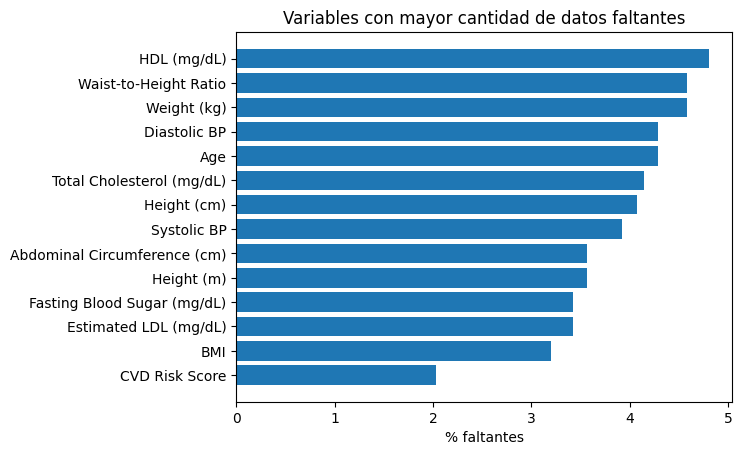

In [63]:
top = tabla_faltantes[tabla_faltantes["n_faltantes"]>0].head(15).sort_values("porcentaje")

plt.figure()
plt.barh(top.index, top["porcentaje"])
plt.xlabel("% faltantes")
plt.title("Variables con mayor cantidad de datos faltantes")
plt.show()

### Conversión de presión arterial

La variable "Blood Pressure (mmHg)" se encuentra como texto en formato "sistólica/diastólica".
Para poder utilizarla en el modelo, se separa en dos variables numéricas.

In [64]:
bp = df["Blood Pressure (mmHg)"].astype(str).str.extract(r"(\d+)/(\d+)")
df["BP_sys_text"] = pd.to_numeric(bp[0], errors="coerce")
df["BP_dia_text"] = pd.to_numeric(bp[1], errors="coerce")

In [65]:
df["Systolic BP"] = df["Systolic BP"].fillna(df["BP_sys_text"])
df["Diastolic BP"] = df["Diastolic BP"].fillna(df["BP_dia_text"])

### Detección de valores físicamente imposibles

Se identifican valores negativos o fuera de rango fisiológico en variables clínicas.
Estos valores no representan condiciones médicas reales sino errores de captura, por lo que se reemplazan por valores faltantes para su posterior imputación.

In [66]:
columnas_no_negativas = [
    "Age","Weight (kg)","Height (m)","BMI",
    "Total Cholesterol (mg/dL)","HDL (mg/dL)",
    "Fasting Blood Sugar (mg/dL)","Estimated LDL (mg/dL)",
    "Systolic BP","Diastolic BP","Waist-to-Height Ratio"
]

for c in columnas_no_negativas:
    if c in df.columns:
        n = (df[c] < 0).sum()
        if n > 0:
            print(c, "valores inválidos:", n)
            df.loc[df[c] < 0, c] = np.nan

Total Cholesterol (mg/dL) valores inválidos: 1
Estimated LDL (mg/dL) valores inválidos: 16


### Validación de coherencia médica

Se validan reglas fisiológicas básicas para evitar datos inconsistentes que afectarían el entrenamiento del modelo.

In [67]:
# diastolica mayor que sistolica
mask = df["Diastolic BP"] > df["Systolic BP"]
print("Casos diastólica > sistólica:", mask.sum())
df.loc[mask, ["Systolic BP","Diastolic BP"]] = np.nan

# BMI fuera de rango humano
mask = (df["BMI"] < 10) | (df["BMI"] > 70)
print("BMI fuera de rango:", mask.sum())
df.loc[mask, "BMI"] = np.nan

# presion imposible
mask = df["Systolic BP"] < 60
print("Presión sistólica imposible:", mask.sum())
df.loc[mask, "Systolic BP"] = np.nan

Casos diastólica > sistólica: 62
BMI fuera de rango: 4
Presión sistólica imposible: 0


Finalmente, se eliminan registros sin la variable objetivo CVD Risk Score,
ya que no pueden ser utilizados para entrenamiento supervisado.

In [68]:
antes = df.shape[0]
df = df.dropna(subset=["CVD Risk Score"])
print("Filas eliminadas:", antes - df.shape[0])

Filas eliminadas: 28
